In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from scipy.spatial import Voronoi
from shapely.geometry import Polygon, box 
import os
from FormationDetector import FormationDetector
from TacticalAnalyzer import TacticalAnalyzer

FORMATIONS_INFO_DB = pd.read_csv("Data/Formations_info.csv")

PITCH_LENGTH = 105
PITCH_WIDTH = 68
PITCH_COLOUR = '#2e8b57'

AREA_CAPTURE_MIN_THRESHOLD = 550 # in m^2

In [2]:
# 1. Initialize Analyst
analyst = TacticalAnalyzer()
formation_detector = FormationDetector(FORMATIONS_INFO_DB)

# 2. Load Data
df = pd.read_csv("tracking_data.csv")

# Filter for Opponent
if 'Team' in df.columns:
    opponent_df = df[df['Team'] == 'Opponent'].copy()

opponent_df

,Frame,ID,Team,X,Y
0,0,0,Opponent,18.560206,15.284321
1,0,1,Opponent,18.382196,37.906847
2,0,2,Opponent,18.337737,50.676589
3,0,3,Opponent,16.534720,58.349240
4,0,4,Opponent,46.138090,12.018132
...,...,...,...,...,...
2495,249,5,Opponent,43.981458,33.440863
2496,249,6,Opponent,43.323014,69.142284
2497,249,7,Opponent,44.130101,84.695407
2498,249,8,Opponent,70.233194,38.213893


In [3]:
# 3. Calculate Centroids
centroids, ids = formation_detector.process_centroids(opponent_df)

centroids

⚠️ Scaling Data detected! Converting 0-100 scale to Meters...


array([[20.87556425, 10.2999009 ],
       [20.93442658, 25.81548449],
       [21.11850704, 35.27270254],
       [20.95403911, 40.82010101],
       [47.39109295,  6.8852038 ],
       [47.22564401, 20.46733405],
       [47.30427343, 47.59810356],
       [47.1225654 , 57.83376048],
       [73.49818542, 27.32009181],
       [73.48893305, 40.81600681]])

In [4]:
# 4. Recognize Formation and Mode
formation, mode, _ = formation_detector.detect_formation_from_player_positions(centroids)
print(f"\n\nFormation : {formation}, Mode : {mode}")

No of coords = 10


Formation : 4-4-2, Mode : Balanced


In [5]:
# 5. Analyze Space & Vulnerabilities
space_data = analyst.analyze_space_control(centroids)
vulnerabilities = analyst.identify_vulnerabilities(space_data)

if vulnerabilities:
    print(f"\n\n⚠️  ALERT: {len(vulnerabilities)} Vulnerabilities Detected")
    for v in vulnerabilities:
        print(f"   -> {v['type']}: {v['detail']}")
else:
    print("✅ No significant structural weaknesses detected.")



⚠️  ALERT: 3 Vulnerabilities Detected
   -> Sparse Coverage: ID 7 covers 619m²
   -> Sparse Coverage: ID 8 covers 1364m²
   -> Sparse Coverage: ID 9 covers 1365m²


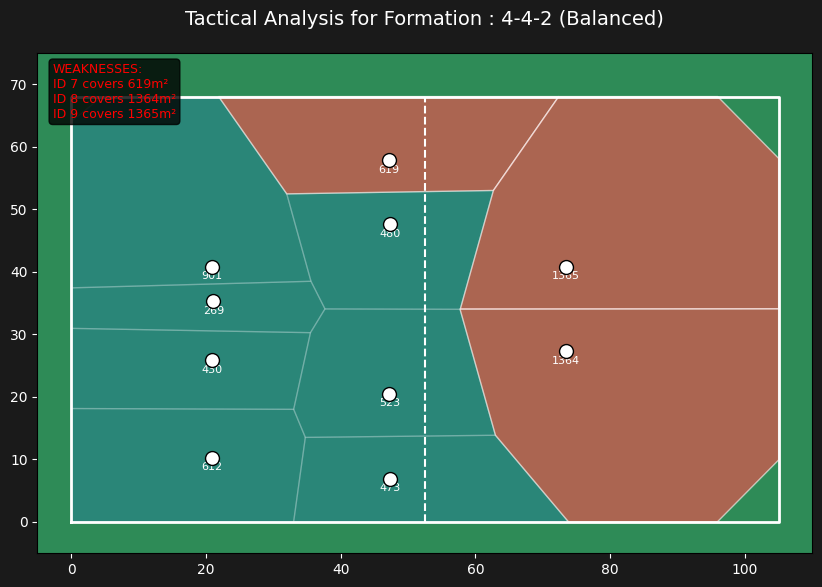

In [6]:
# 6. Visualize
analyst.visualize_using_voronoi(centroids, formation + " (" + mode + ")", space_data, vulnerabilities)